In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
notebook_dir = os.getcwd() 
src_path = os.path.abspath(os.path.join(notebook_dir, '../src'))
sys.path.append(src_path)

from visualization import create_histograms, scatter_plot, grouped_histograms, histograms_with_price
from preprocessing import group_by_engine
df = pd.read_csv('C:\\Users\\facuv\\Machine-Learning\\Vulcano_Facundo_TP2\\data\\raw\\toyota_dev.csv')

In [57]:
print(df.head())

      id           Tipo     Año     Color Tipo de combustible Transmisión  \
0  16631      Hilux SW4  2013.0  Plateado               Nafta  Automática   
1  16568      Hilux SW4  1999.0       NaN              Diésel      Manual   
2   4694  Corolla Cross  2023.0    Blanco               Nafta  Automática   
3   4806  Corolla Cross  2023.0      Gris               Nafta  Automática   
4   9838      Hilux SW4  2017.0       NaN              Diésel      Manual   

  Motor  Kilómetros Tipo de vendedor   Precio Motor_Agrupado  
0   2.7    176000.0       particular  22000.0            2.7  
1   3.0    516000.0       particular  14800.0            3.0  
2     2      1111.0    concesionaria  36000.0            2.0  
3   2.0      2000.0       particular  33900.0            2.0  
4   2.8    119000.0       particular  32000.0            2.8  


**Generar histogramas para visualizar la distribución de tipos de vehículo, años
de fabricación y kilómetros recorridos.**

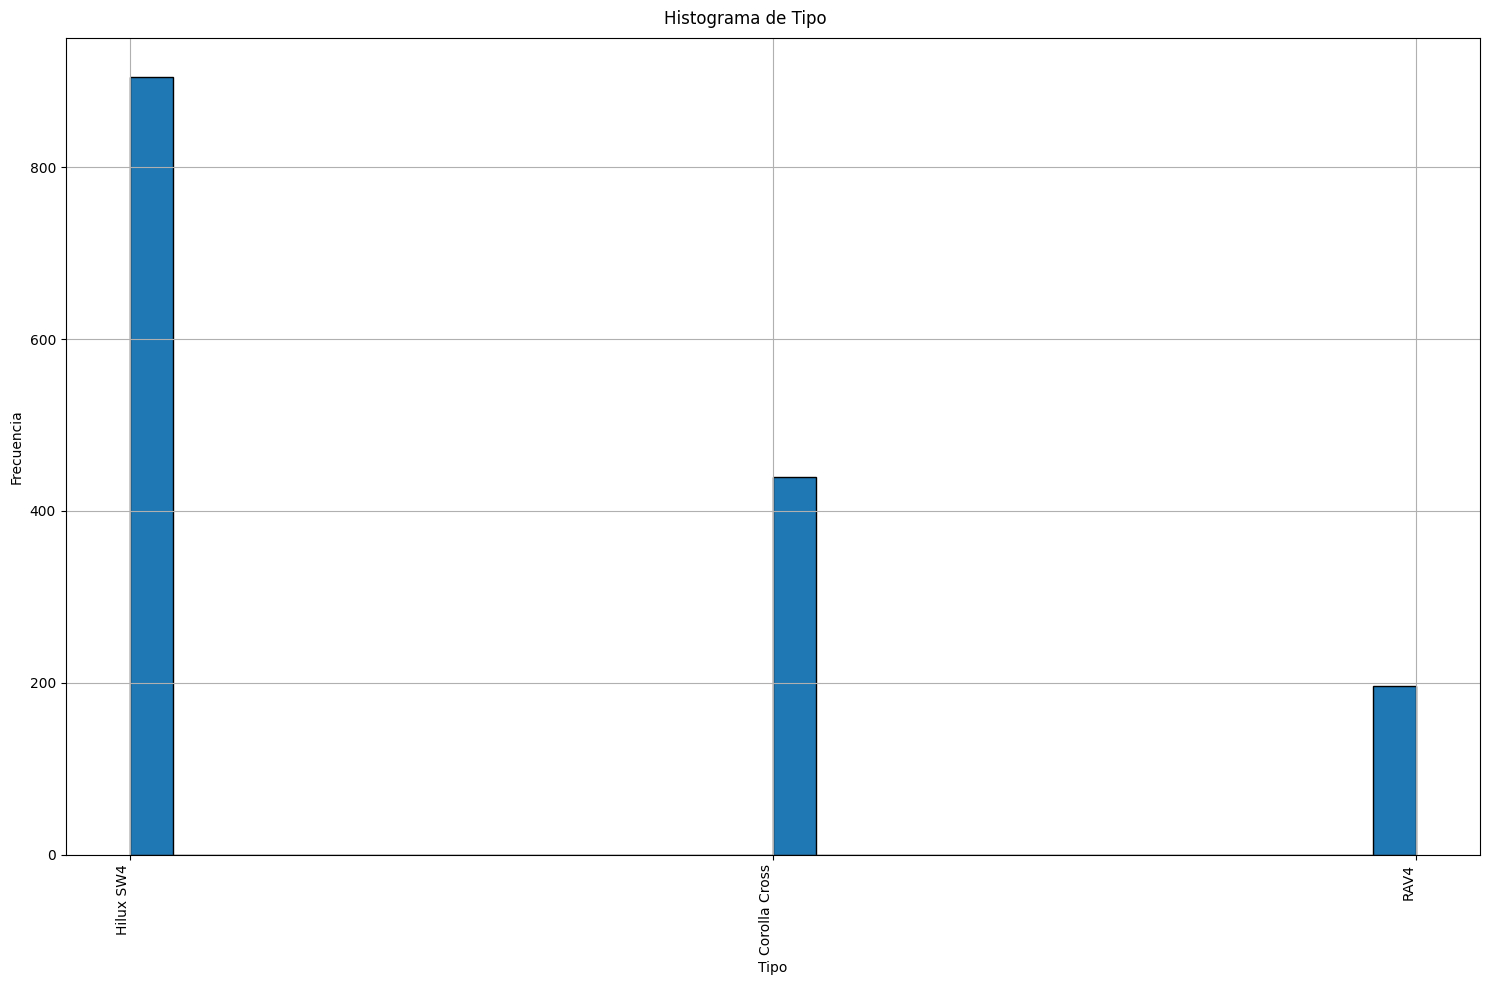

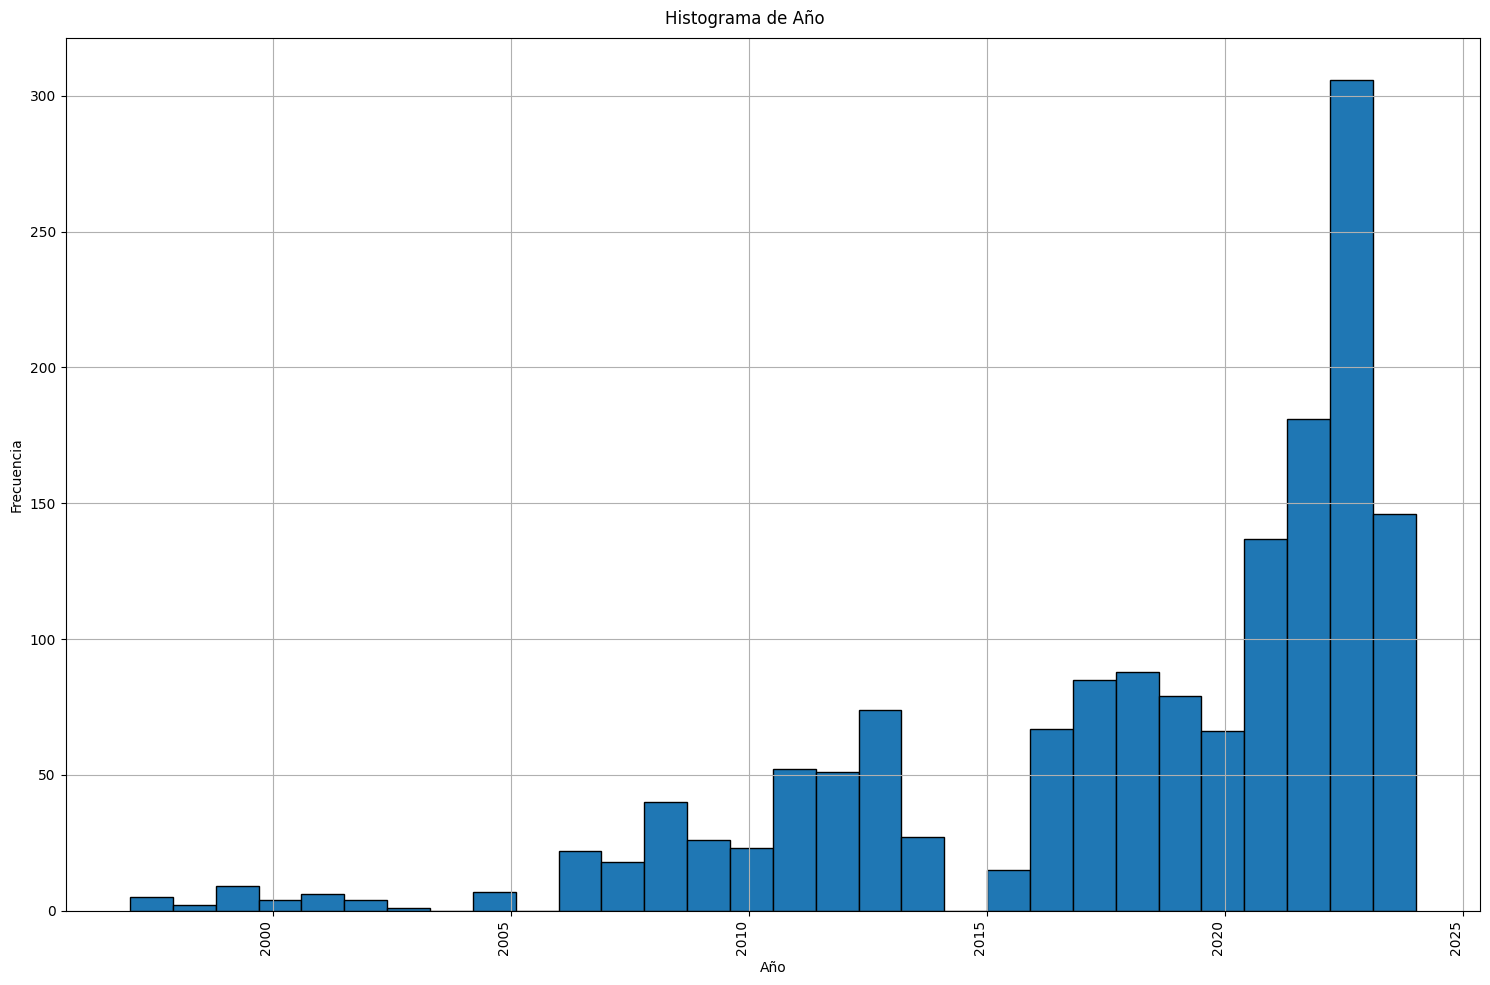

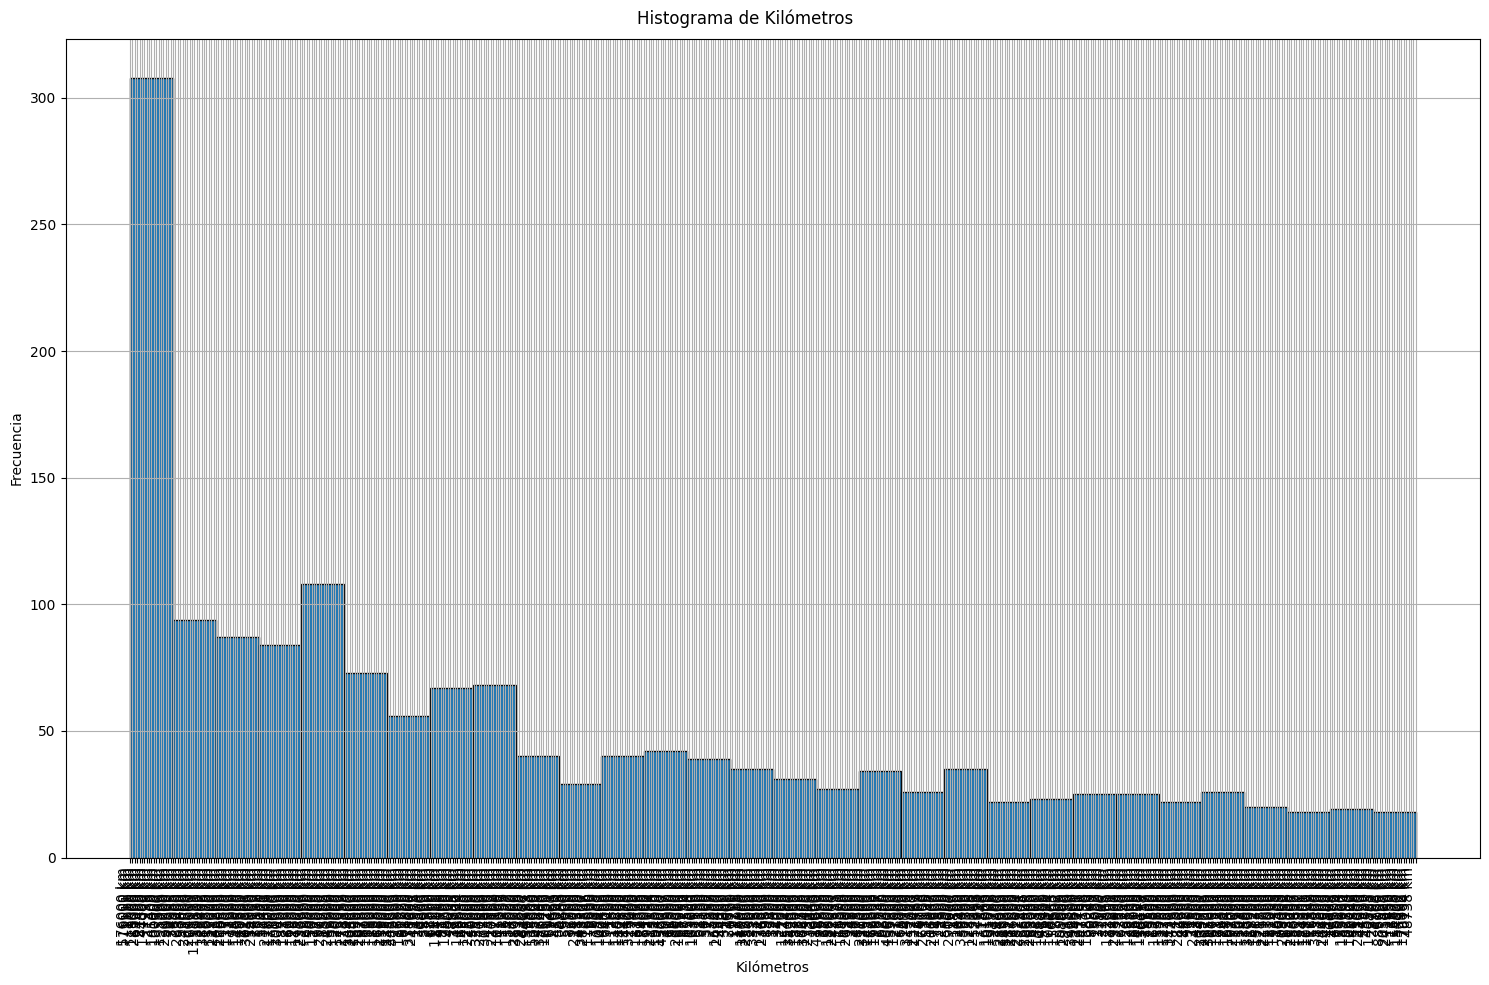

In [2]:
features_ = ['Tipo', 'Año', 'Kilómetros']
create_histograms(features_, df)


In [33]:
cantidad_hilux = df[df['Tipo'] == 'Hilux SW4']['Tipo'].count()
print(f'cantidad_hilux: {cantidad_hilux}')
cantidad_corolla_cross = df[df['Tipo'] == 'Corolla Cross']['Tipo'].count()
print(f'cantidad_corolla_cross: {cantidad_corolla_cross}')
cantidad_RAV4 = df[df['Tipo'] == 'RAV4']['Tipo'].count()
print(f'cantidad de RAV4: {cantidad_RAV4}')

cantidad_hilux: 905
cantidad_corolla_cross: 440
cantidad de RAV4: 196


In [43]:
promedio_anio_fabricacion = df['Año'].mean()
print(f'El año de fabricacion de todos los autos promedio es: {promedio_anio_fabricacion}')

promedio_anio_fabriacion_hilux = df[df['Tipo'] == 'Hilux SW4']['Año'].mean()
print(f'El promedio de anio de fabricacion de la hilux es: {promedio_anio_fabriacion_hilux}')
valores_unicos_anio_fabricacion_hilux = df[df['Tipo'] == 'Hilux SW4']['Año'].unique()
print(f'Valores unicos de fabricacion de la hilux: {valores_unicos_anio_fabricacion_hilux}')

promedio_anio_fabriacion_corolla = df[df['Tipo'] == 'Corolla Cross']['Año'].mean()
print(f'El promedio de anio de fabricacion del Corolla Cross es: {promedio_anio_fabriacion_corolla}')
valores_unicos_anio_fabricacion_corolla = df[df['Tipo'] == 'Corolla Cross']['Año'].unique()
print(f'Valores unicos de fabricacion del Corolla Cross es: {valores_unicos_anio_fabricacion_corolla}')

promedio_anio_fabriacion_RAV4 = df[df['Tipo'] == 'RAV4']['Año'].mean()
print(f'El promedio de anio de fabricacion de la RAV4 es: {promedio_anio_fabriacion_RAV4}')
valores_unicos_anio_fabricacion_RAV4= df[df['Tipo'] == 'RAV4']['Año'].unique()
print(f'Valores unicos de fabricacion de la RAV4: {valores_unicos_anio_fabricacion_RAV4}')


El año de fabricacion de todos los autos promedio es: 2018.259571706684
El promedio de anio de fabricacion de la hilux es: 2016.7613259668508
Valores unicos de fabricacion de la hilux: [2013. 1999. 2017. 2018. 2021. 2020. 2011. 2010. 2019. 2023. 2006. 2008.
 2012. 2009. 2022. 2024. 2007. 2016. 2014. 2015. 1997. 2001. 2002. 2005.
 2003. 1998. 2000.]
El promedio de anio de fabricacion del Corolla Cross es: 2022.784090909091
Valores unicos de fabricacion del Corolla Cross es: [2023. 2021. 2024. 2022.]
El promedio de anio de fabricacion de la RAV4 es: 2015.0204081632653
Valores unicos de fabricacion de la RAV4: [2017. 2018. 2021. 2008. 2013. 2019. 2009. 2012. 2011. 2014. 2010. 2022.
 2020. 2015. 2023. 2016. 2002.]


In [56]:
promedio_kilometros_hilux = df[df['Tipo'] == 'Hilux SW4']['Kilómetros'].mean()
print(f'El promedio de kilometros de la hilux es: {promedio_kilometros_hilux}')

promedio_kilometros_RAV4 = df[df['Tipo'] == 'RAV4']['Kilómetros'].mean()
print(f'El promedio de kilometros de la RAV4 es: {promedio_kilometros_RAV4}')

promedio_kilometros_corolla = df[df['Tipo'] == 'Corolla Cross']['Kilómetros'].mean()
print(f'El promedio de kilometros de la Corolla Cross es: {promedio_kilometros_corolla}')

El promedio de kilometros de la hilux es: 116940.017679558
El promedio de kilometros de la RAV4 es: 122026.58673469388
El promedio de kilometros de la Corolla Cross es: 18405.159090909092


Analisis de los graficos:

- Grafico 1 (Histograma de modelos): Hay una mayoria de vehiculos del tipo Hilux SW4 (905), luego esta seguido por el corolla cross (440), por ultimo el RAV4 (196)
- Grafico 2 (Histograma de anio de fabricacion): Se observa una mayoria de autos relativamente actuales, el promedio de anio de fabricacion de todos los autos es 2018 asique se trata de autos que no serian considerados viejos en el mercado.
- Grafico 3 (Histograma de kilometros recorridos): 

**Crear gráficos de dispersión para analizar la cobertura de datos en el espa-
cio de kilómetros recorridos y años de fabricación, diferenciando por tipo de
vehículo**

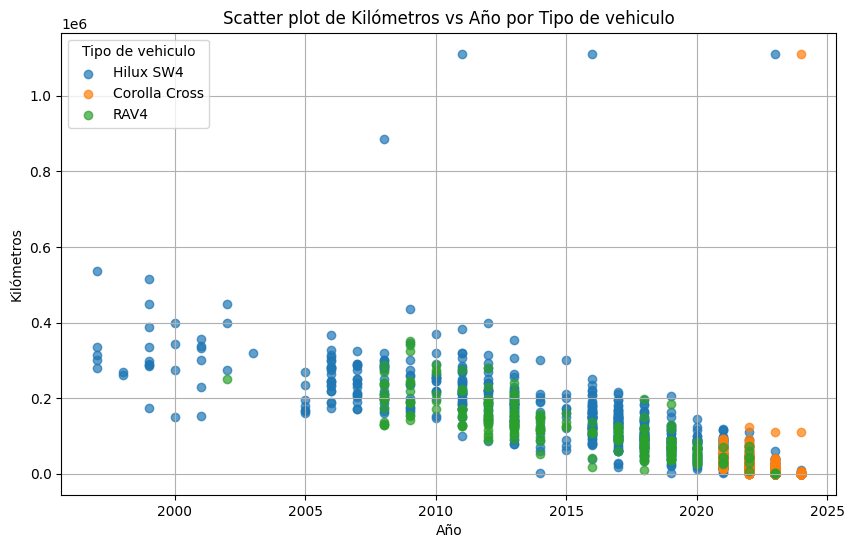

In [3]:
scatter_plot(df, 'Año', 'Kilómetros',  'Tipo')

Analisis del grafico:

**Visualizar la distribución de la variable “Motor” según el tipo de vehículo.
¿Cómo podría agrupar o simplificar las categorías para obtener un análisis
más claro?**

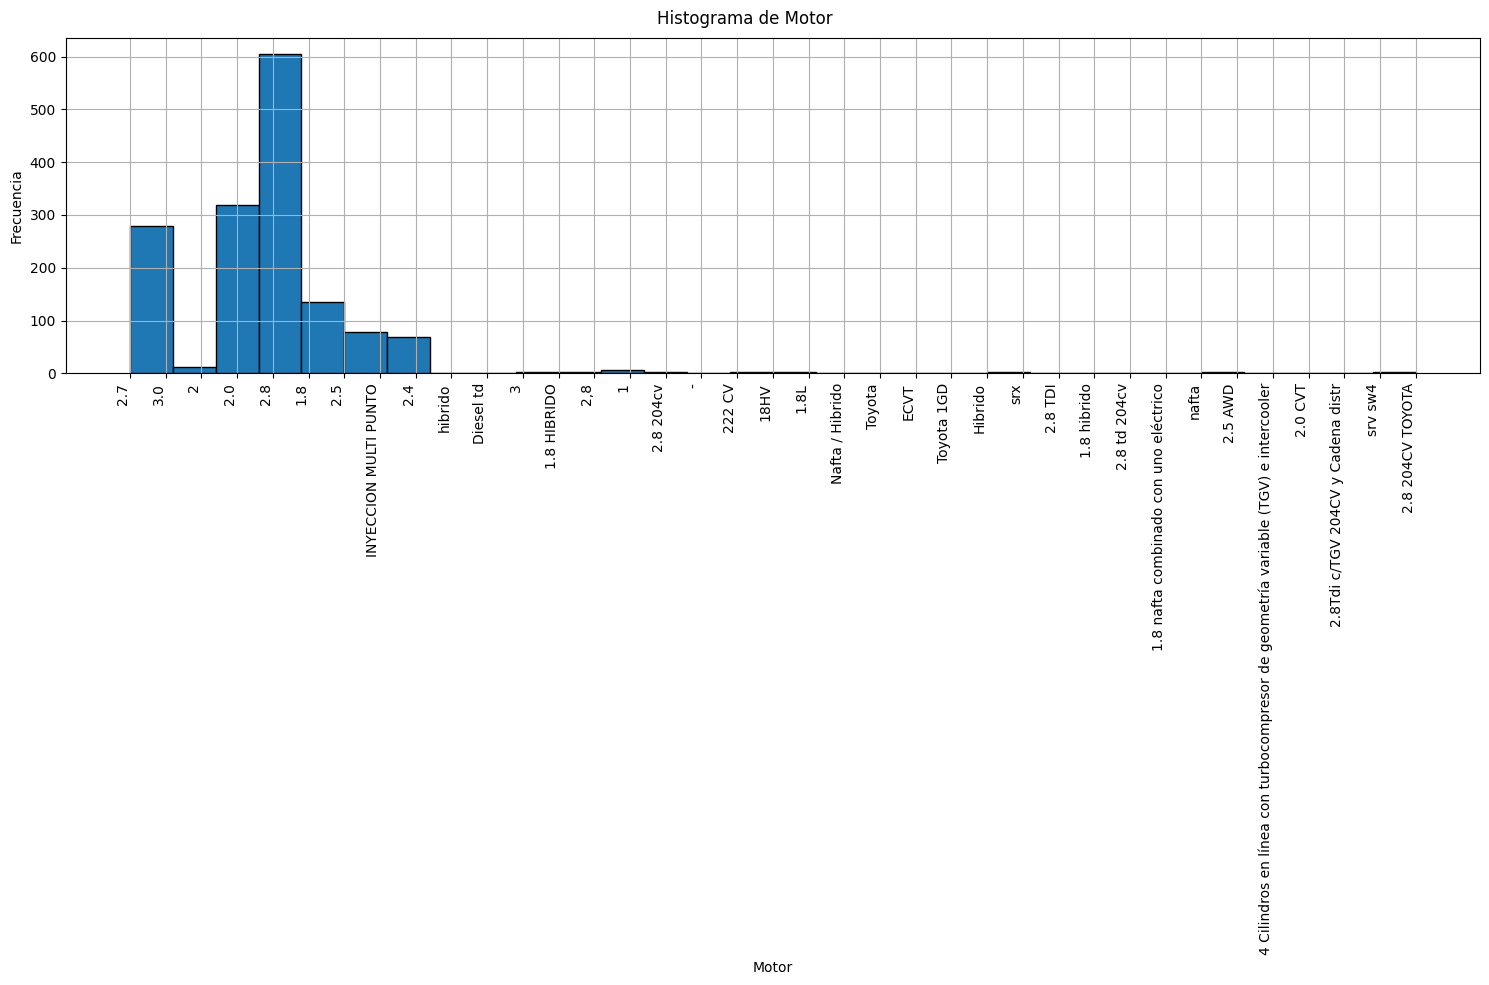

In [4]:
Motor = ['Motor']
create_histograms(Motor, df)

df['Motor'] = df['Motor'].astype(str).str.lower().str.strip()
df['Motor_Agrupado'] = df['Motor'].apply(group_by_engine)

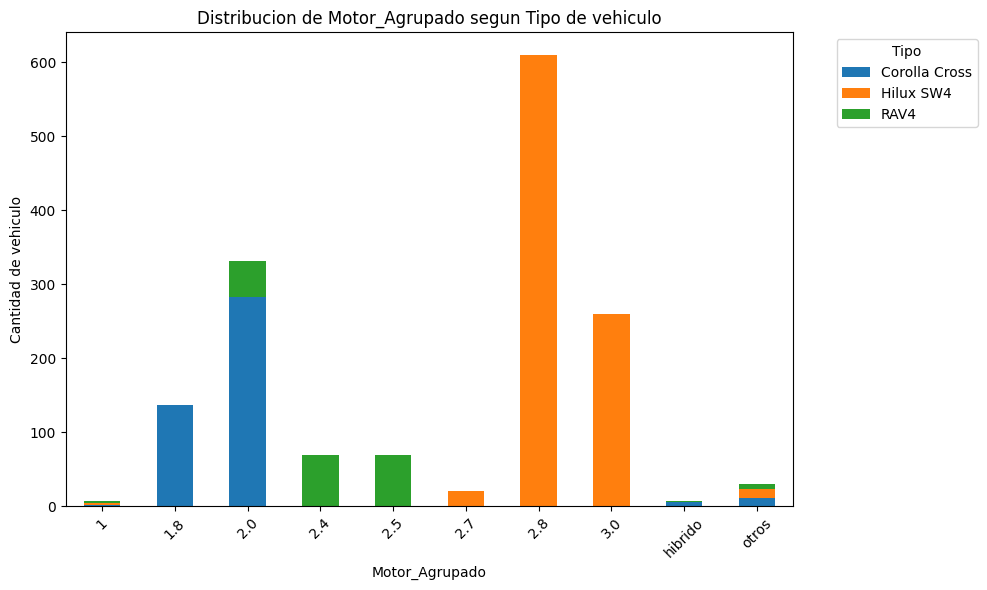

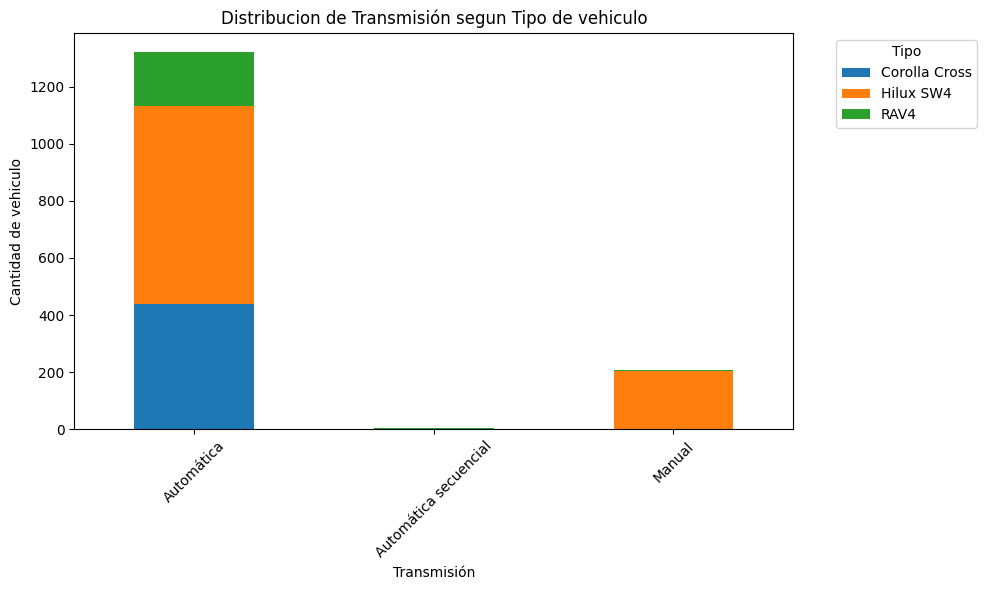

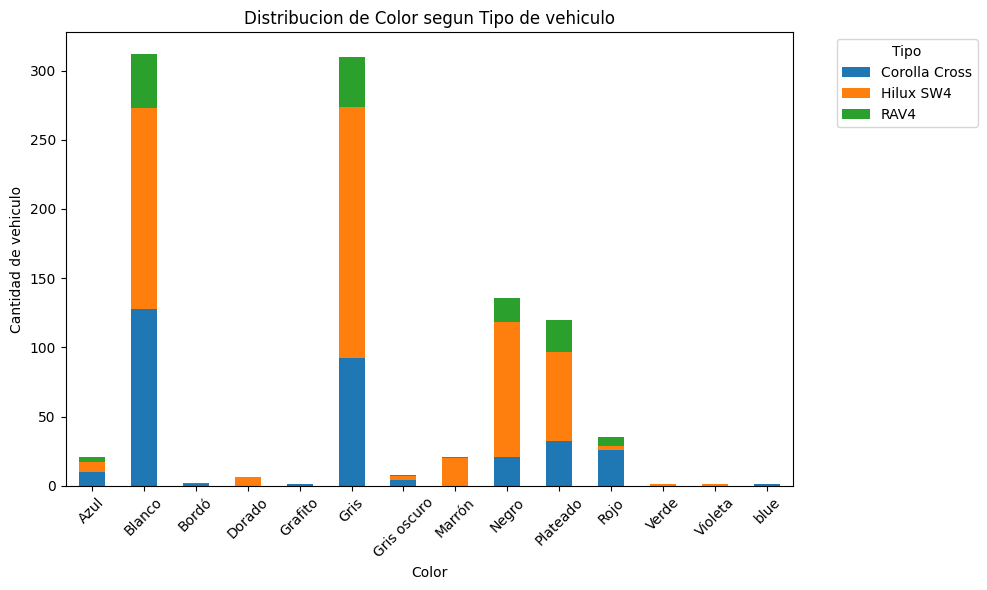

In [5]:
features1 = ['Motor_Agrupado', 'Transmisión', 'Color']


for feature1 in features1:
    grouped_histograms(feature1, 'Tipo', df)

Analisis de graficos:

Histograma1 (distribucion de motor segun el tipo de vehiculo):

Histograma2 (distribucion de tipo de transmision en funcion del vehiculo):

Histograma3 (distribucion de la variable color entre los tipos de vehiculos):

**isualizar cómo varía el precio de venta en función de los kilómetros recorridos
por el vehículo. ¿Observa la misma tendencia para los diferentes tipos de
vehículo?**

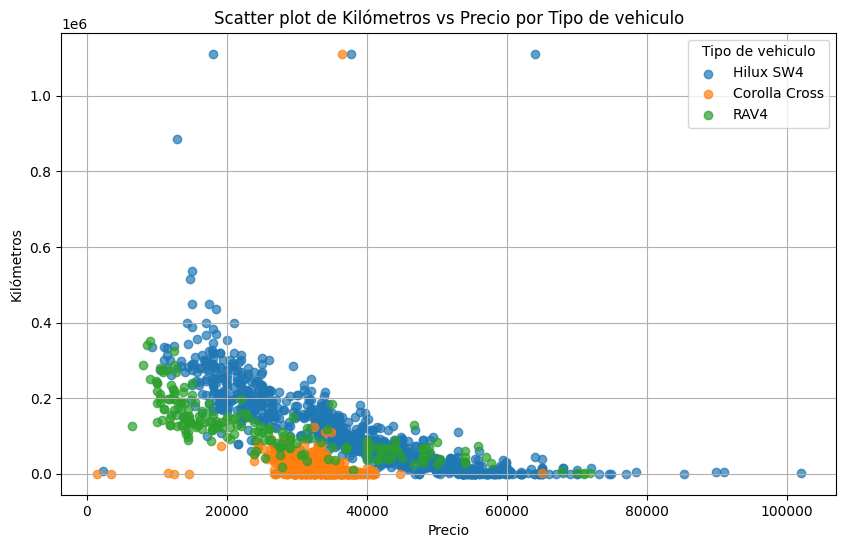

In [6]:
scatter_plot(df, 'Precio', 'Kilómetros',  'Tipo')

Analisis del grafico:

Comparar la distribución de precios de venta entre los distintos tipos de SUV.
¿Identifica la presencia de outliers?

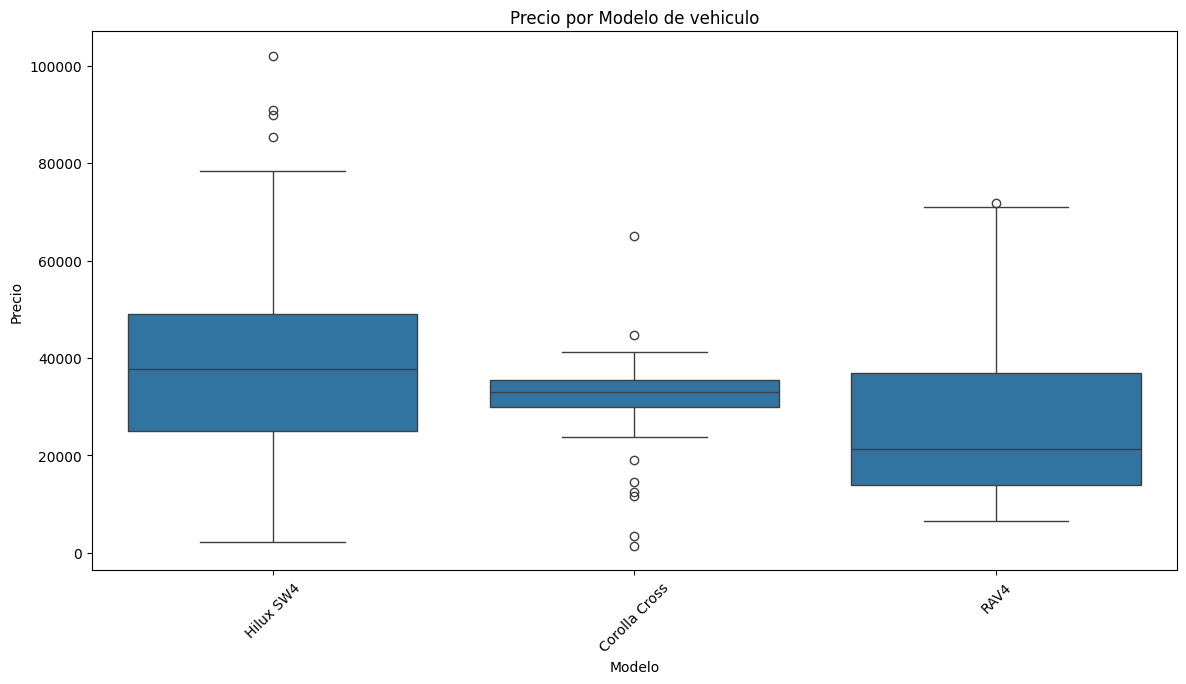

In [7]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x = 'Tipo', y='Precio')
plt.title('Precio por Modelo de vehiculo')
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

Analisis del grafico:

**Analizar la distribución del precio de venta según el año del vehículo.**

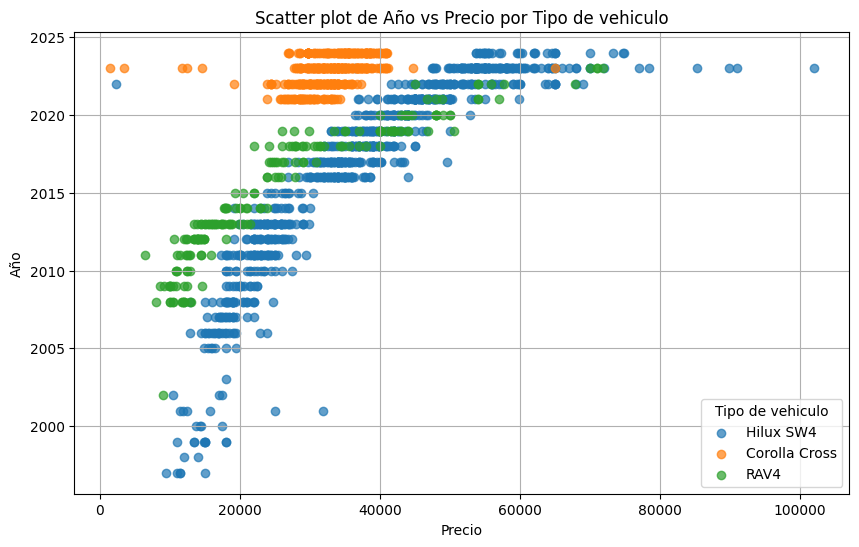

In [8]:
scatter_plot(df, 'Precio', 'Año', 'Tipo')

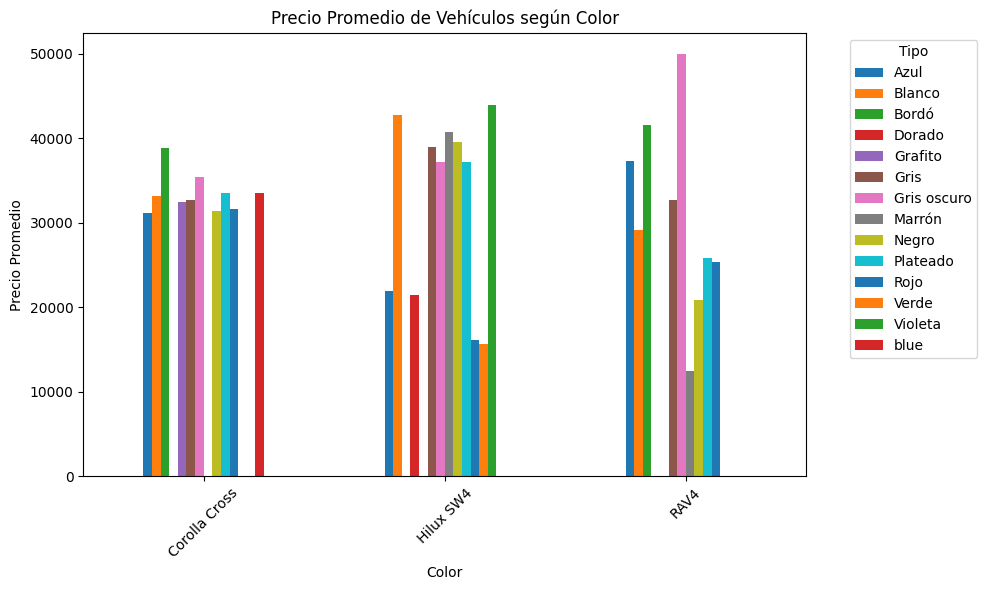

In [15]:
color = 'Color'
tipo = 'Tipo'

histograms_with_price(df, color, tipo)

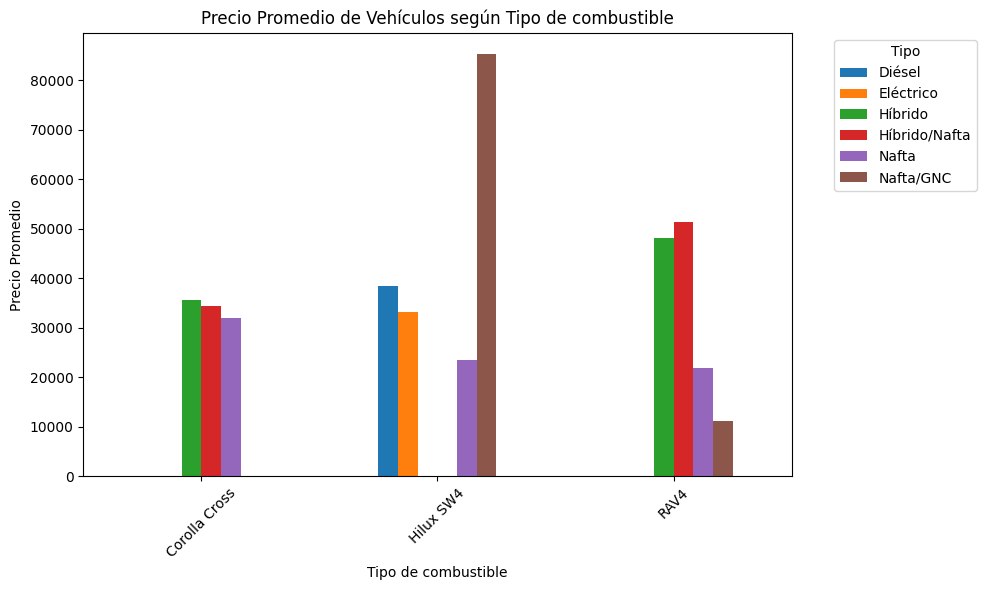

In [16]:
feature1 = 'Tipo de combustible'
feature2 = 'Tipo'

histograms_with_price(df, feature1, feature2)

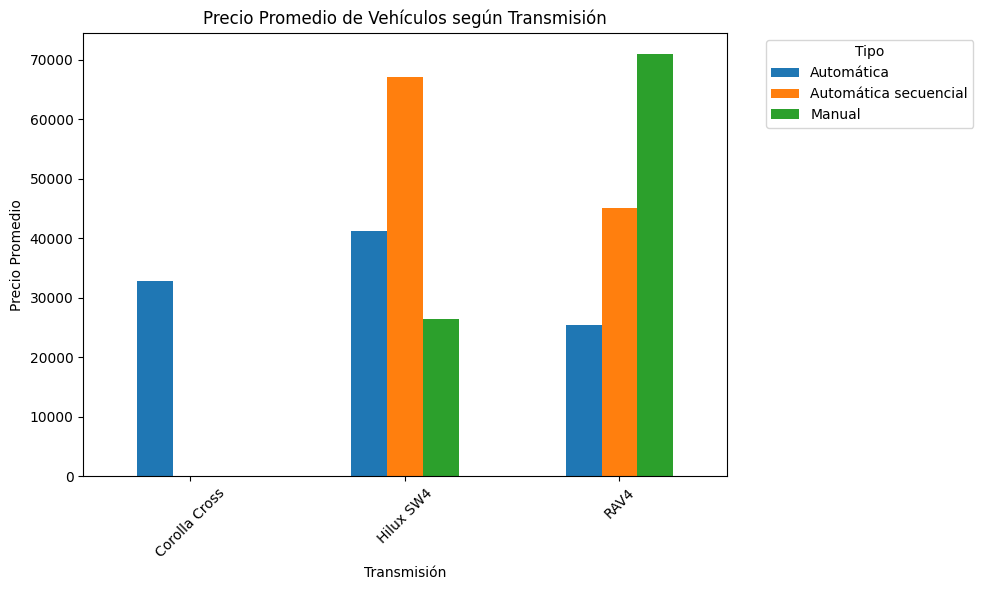

In [18]:
feature1 = 'Transmisión'
feature2 = 'Tipo'

histograms_with_price(df, feature1, feature2)


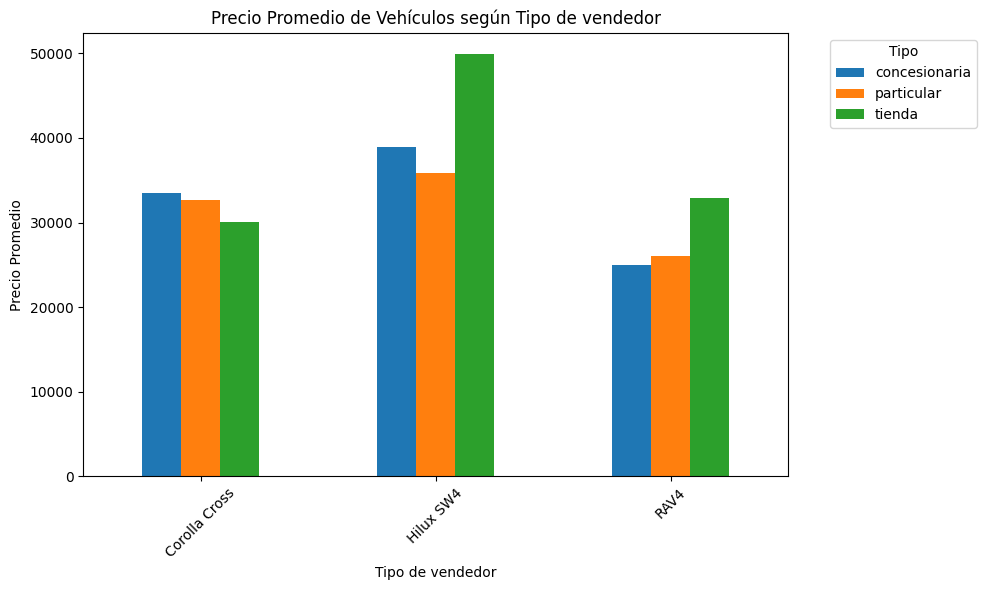

In [20]:
feature1 = 'Tipo de vendedor'
feature2 = 'Tipo'

histograms_with_price(df, feature1, feature2)

In [58]:
df.head()

,id,Tipo,Año,Color,Tipo de combustible,Transmisión,Motor,Kilómetros,Tipo de vendedor,Precio,Motor_Agrupado
0,16631,Hilux SW4,2013.0,Plateado,Nafta,Automática,2.7,176000.0,particular,22000.0,2.7
1,16568,Hilux SW4,1999.0,NaN,Diésel,Manual,3.0,516000.0,particular,14800.0,3.0
2,4694,Corolla Cross,2023.0,Blanco,Nafta,Automática,2,1111.0,concesionaria,36000.0,2.0
3,4806,Corolla Cross,2023.0,Gris,Nafta,Automática,2.0,2000.0,particular,33900.0,2.0
4,9838,Hilux SW4,2017.0,NaN,Diésel,Manual,2.8,119000.0,particular,32000.0,2.8


In [59]:
df['Tipo'].unique()

array(['Hilux SW4', 'Corolla Cross', 'RAV4'], dtype=object)

In [60]:
df['Año'].unique()

array([2013., 1999., 2023., 2017., 2018., 2021., 2020., 2024., 2022.,
       2011., 2010., 2019., 2006., 2008., 2012., 2009., 2007., 2016.,
       2014., 2015., 1997., 2001., 2002., 2005., 2003., 1998., 2000.])

In [61]:
df['Color'].unique()

array(['Plateado', nan, 'Blanco', 'Gris', 'Negro', 'Marrón', 'Rojo',
       'Gris oscuro', 'Azul', 'Verde', 'Dorado', 'Bordó', 'blue',
       'Violeta', 'Grafito'], dtype=object)

In [62]:
df['Tipo de combustible'].unique()

array(['Nafta', 'Diésel', 'Híbrido/Nafta', 'Híbrido', 'Eléctrico',
       'Nafta/GNC'], dtype=object)

In [63]:
df['Transmisión'].unique()

array(['Automática', 'Manual', nan, 'Automática secuencial'], dtype=object)

In [64]:
df['Motor'].unique()

array(['2.7', '3.0', '2', '2.0', '2.8', '1.8', '2.5',
       'inyeccion multi punto', '2.4', 'hibrido', 'diesel td', '3',
       '1.8 hibrido', '2,8', '1', '2.8 204cv', '-', '222 cv', '18hv',
       '1.8l', 'nan', 'nafta / hibrido', 'toyota', 'ecvt', 'toyota 1gd',
       'srx', '2.8 tdi', '2.8 td 204cv',
       '1.8 nafta combinado con uno eléctrico', 'nafta', '2.5 awd',
       '4 cilindros en línea con turbocompresor de geometría variable (tgv) e intercooler',
       '2.0 cvt', '2.8tdi c/tgv 204cv y cadena distr', 'srv sw4',
       '2.8 204cv toyota'], dtype=object)

In [65]:
df['Kilómetros'].unique()

array([1.760000e+05, 5.160000e+05, 1.111000e+03, 2.000000e+03,
       1.190000e+05, 2.850000e+05, 6.900000e+04, 2.440000e+04,
       8.130000e+04, 1.440000e+05, 9.990000e+02, 0.000000e+00,
       4.140000e+04, 1.850000e+05, 1.000000e+05, 5.000000e+02,
       1.950000e+05, 1.200000e+03, 2.200000e+05, 9.050000e+04,
       7.000000e+04, 3.498500e+04, 2.600000e+04, 2.650000e+05,
       3.400000e+03, 9.000000e+04, 2.430000e+05, 1.500000e+03,
       2.000000e+05, 6.500000e+04, 1.111111e+06, 5.060000e+04,
       3.900000e+04, 1.264020e+05, 3.880000e+05, 1.657000e+04,
       3.000000e+04, 1.520000e+05, 2.210000e+05, 4.320000e+04,
       1.080000e+05, 2.880000e+05, 9.500000e+03, 1.170000e+05,
       1.350000e+05, 7.200000e+04, 1.000000e+03, 1.980000e+05,
       1.400000e+05, 1.495000e+05, 1.000000e+04, 8.150100e+04,
       3.020000e+05, 1.590000e+04, 2.590000e+05, 7.400000e+04,
       3.911200e+04, 1.600000e+04, 5.200000e+04, 3.142100e+04,
       2.100000e+05, 1.180000e+05, 1.700000e+05, 1.6000

In [66]:
df['Precio'].unique()

array([ 22000.        ,  14800.        ,  36000.        ,  33900.        ,
        32000.        ,  13400.        ,  39900.        ,  28700.        ,
        44880.38277512,  40191.38755981,  37320.57416268,  29747.36842105,
        29282.29665072,  23000.        ,  38000.        ,  34449.76076555,
        31800.        ,  40900.        ,  26000.        ,  25358.85167464,
        30143.54066986,  48000.        ,  18500.        ,  35500.        ,
        49000.        ,  45900.        ,  16000.        ,  19010.        ,
        40000.        ,  18086.12440191,  34162.67942584,  46500.        ,
        39234.44976077,  33492.82296651,  15000.        ,  43400.        ,
        40999.        ,  26500.        ,  18181.81818182,  48900.        ,
        37000.        ,   8000.        ,  38086.12440191,  39500.        ,
        33700.        ,  22009.56937799,  35406.69856459,  26794.25837321,
        34354.06698565,  11661.24401914,  20095.6937799 ,  77033.49282297,
        34928.22966507,  

In [67]:
df['Tipo de vendedor'].unique()

array(['particular', 'concesionaria', 'tienda'], dtype=object)

1- Remover los puntos de los anios ok
2- color tiene valores nan
3- en combustibles hay hibrido/naafta que eso seria hibrido
4- hay valores nan en transmision
5- Motor se puede agrupar ok
6- precio tiene puntos ok
7- hay precios con coma, se podria convertir a entero quizas ok
8- kilometros tiene km y .ok



In [81]:
# num_nan_transmision = df['Transmisión'].isna().sum()
# print(num_nan_transmision)
# num_nan_color = df['Color'].isna().sum()
# print(num_nan_color)

# autos_sin_color = df[df['Color'].isna()]

print(df[''].isna().sum())

# tipos_de_autos_sin_color = autos_sin_color['Tipo'].value_counts()
# print(tipos_de_autos_sin_color)


0


se me ocurre esto para completar los valore faltantes. Se que la variable que tiene mayor cantidad de valores faltantes es la variable color. Lo que puedo hacer es, primero veo cuantos autos de cada tipo tienen la variable color faltante. Luego, me fijo cual es el precio promedio de esos autos que no tienen color. Una vez obtenido el valor promedio, me fijo en algun grafico a que color corresponderia. 